In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('dataset.csv')
df

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [7]:
df_description = df.describe()
print(df_description)

           Capacity     Occupancy
count  35717.000000  35717.000000
mean    1397.550130    642.228911
std     1179.326833    656.955535
min      220.000000     -8.000000
25%      500.000000    210.000000
50%      849.000000    446.000000
75%     2009.000000    798.000000
max     4675.000000   4327.000000


The summary statistics provide an overview of the capacity and occupancy across all records. The average capacity is approximately 1398 with a standard deviation of about 1179, indicating a wide range of parking capacities. The occupancy has a mean of around 642 and also shows a large variation.



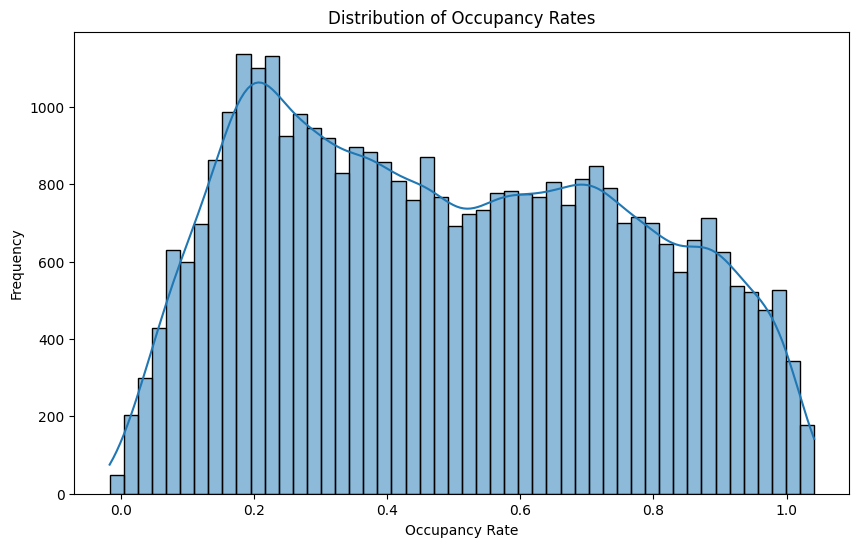

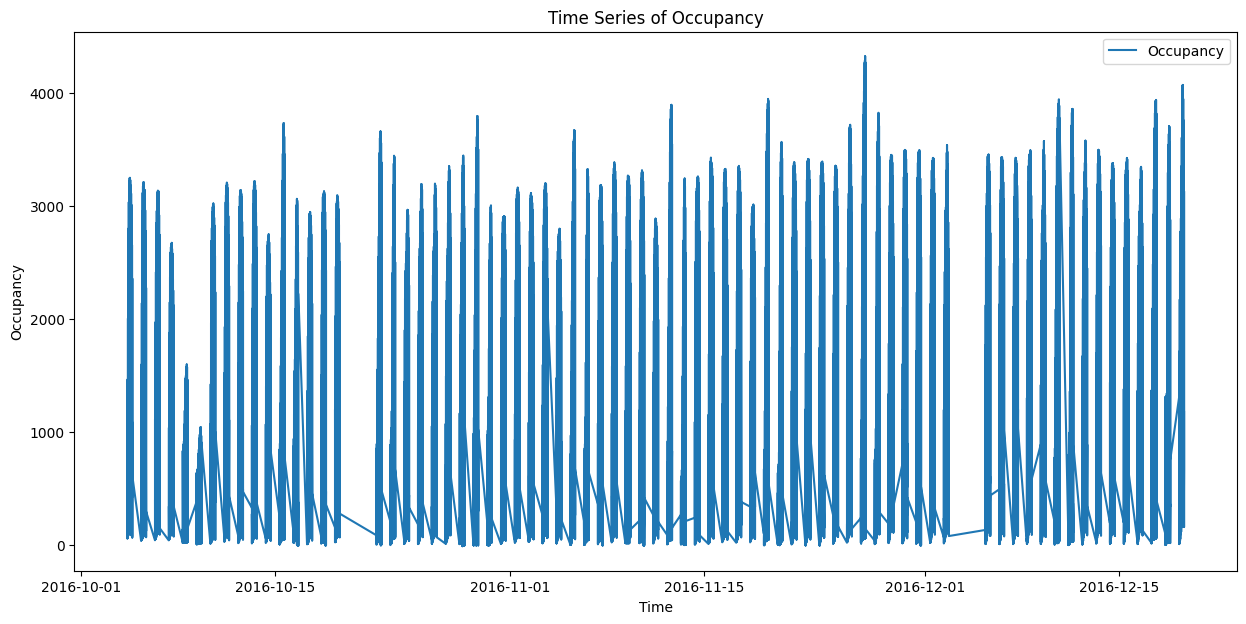

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the occupancy rate
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

# Plot the distribution of occupancy rates
plt.figure(figsize=(10, 6))
sns.histplot(df['OccupancyRate'], bins=50, kde=True)
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

# Convert LastUpdated to datetime and sort the dataframe by it
df['LastUpdated'] = pd.to_datetime(df['LastUpdated'])
df.sort_values('LastUpdated', inplace=True)

# Plot a time series of occupancy over time
plt.figure(figsize=(15, 7))
plt.plot(df['LastUpdated'], df['Occupancy'], label='Occupancy')
plt.title('Time Series of Occupancy')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

The distribution of occupancy rates has been plotted, showing how frequently different rates occur. Additionally, a time series graph of occupancy over time has been created to visualize any trends or patterns.

The occupancy rate distribution will help us understand the general utilization of parking spaces.
The time series graph can reveal patterns related to time, such as daily or weekly cycles in parking occupancy.

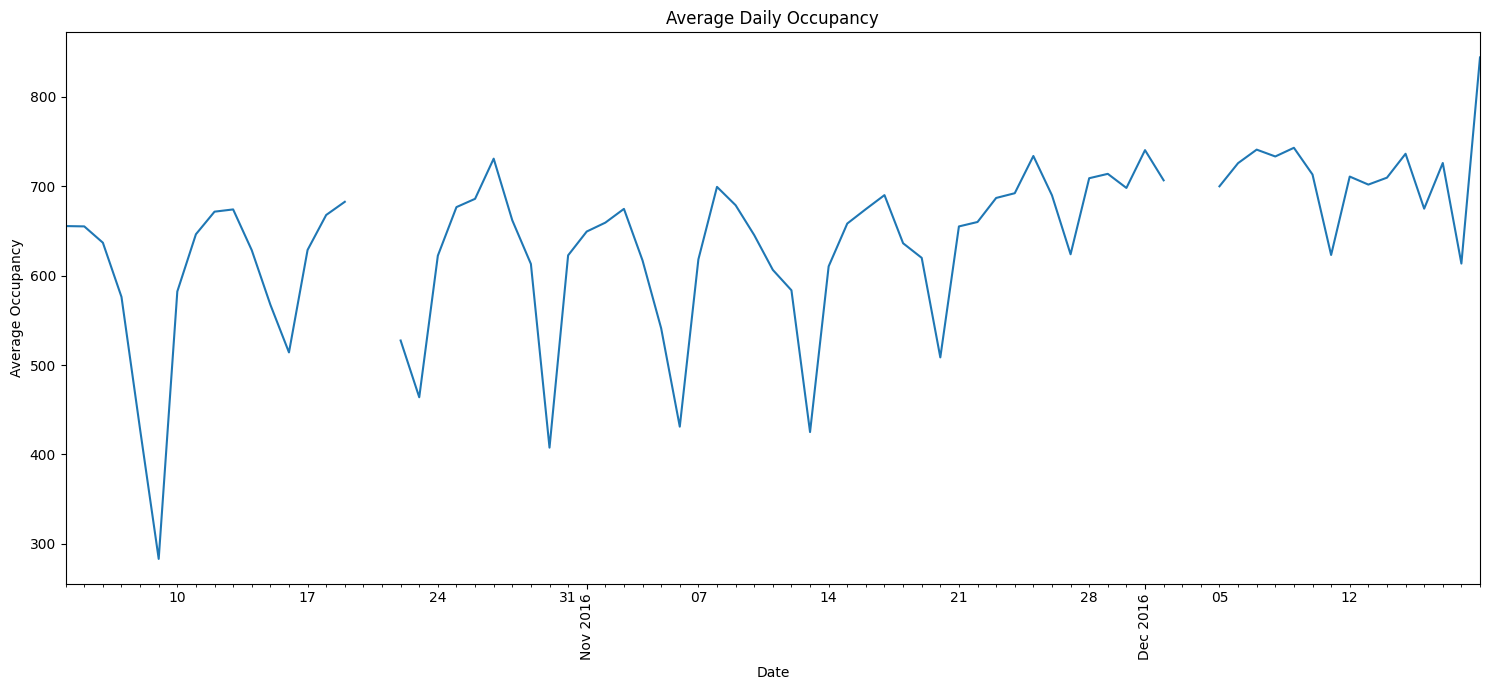

In [9]:
import matplotlib.dates as mdates

# Set the date as the index
df.set_index('LastUpdated', inplace=True)

# Resample the data by day and calculate the mean occupancy
# This will give us the average daily occupancy
average_daily_occupancy = df['Occupancy'].resample('D').mean()

# Plot the average daily occupancy
plt.figure(figsize=(15, 7))
average_daily_occupancy.plot()
plt.title('Average Daily Occupancy')
plt.xlabel('Date')
plt.ylabel('Average Occupancy')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph above displays the average daily occupancy of parking spaces over time. This visualization can help identify trends, such as days with particularly high or low usage, and can be useful for forecasting future occupancy levels based on historical patterns.

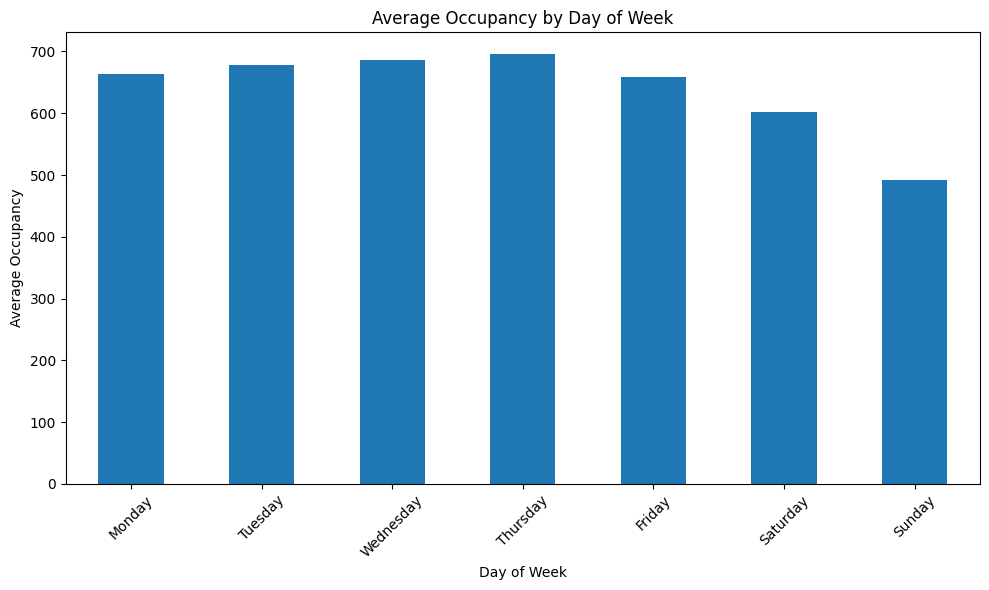

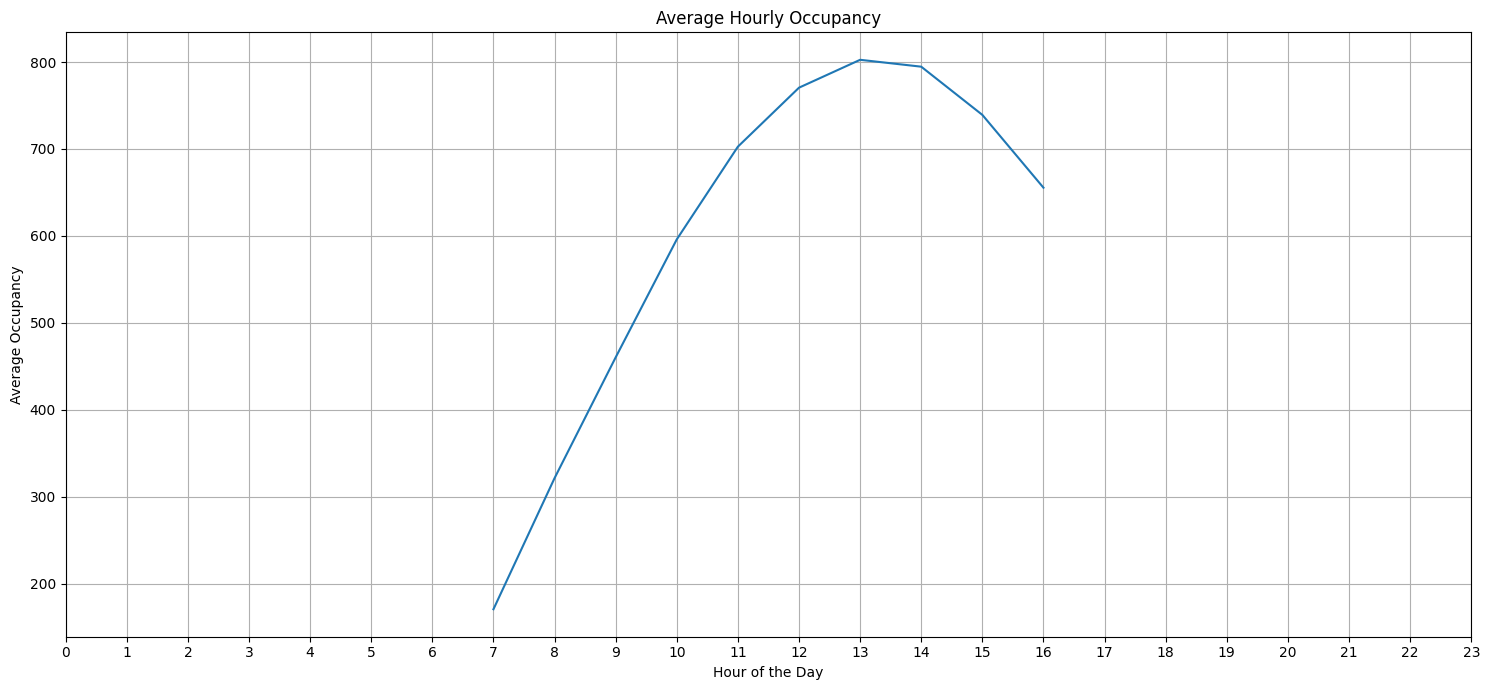

In [10]:
import numpy as np

# Add a new column for the day of the week
# Monday=0, Sunday=6
df['DayOfWeek'] = df.index.dayofweek

# Group by the day of the week and calculate the mean occupancy for each day
weekly_occupancy = df.groupby('DayOfWeek')['Occupancy'].mean()

# Convert the day of the week from numbers to names
weekly_occupancy.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the mean occupancy for each day of the week
plt.figure(figsize=(10, 6))
weekly_occupancy.plot(kind='bar')
plt.title('Average Occupancy by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Occupancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the hourly occupancy by resampling and taking the mean
hourly_occupancy = df['Occupancy'].resample('H').mean()

# Group by hour of the day and calculate the mean occupancy for each hour
hourly_occupancy_mean = hourly_occupancy.groupby(hourly_occupancy.index.hour).mean()

# Plot the mean occupancy for each hour of the day
plt.figure(figsize=(15, 7))
hourly_occupancy_mean.plot()
plt.title('Average Hourly Occupancy')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Occupancy')
plt.xticks(np.arange(24))
plt.grid(True)
plt.tight_layout()
plt.show()

The first chart shows the average occupancy by day of the week, which can indicate which days experience higher parking demand.
The second chart illustrates the average hourly occupancy, revealing the times of day when parking spaces are most and least occupied.

In [11]:
# Check for missing values in the average_daily_occupancy series
missing_values = average_daily_occupancy.isnull().sum()
print('Missing values in average_daily_occupancy:', missing_values)

# If there are missing values, we can consider filling them
# For now, let's check the missing dates
missing_dates = average_daily_occupancy[average_daily_occupancy.isnull()].index
print('Missing dates:', missing_dates)

# We can fill missing values using different strategies such as forward fill or interpolation
# Let's use forward fill as an example
average_daily_occupancy_filled = average_daily_occupancy.fillna(method='ffill')

# Check again for missing values after filling
missing_values_filled = average_daily_occupancy_filled.isnull().sum()
print('Missing values after filling:', missing_values_filled)

Missing values in average_daily_occupancy: 4
Missing dates: DatetimeIndex(['2016-10-20', '2016-10-21', '2016-12-03', '2016-12-04'], dtype='datetime64[ns]', name='LastUpdated', freq=None)
Missing values after filling: 0


There were 4 missing values in the average daily occupancy data.
The missing dates were October 20th, October 21st, December 3rd, and December 4th of 2016.
After applying a forward fill method to handle the missing data, there are no missing values left.


/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_12740/2188667349.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


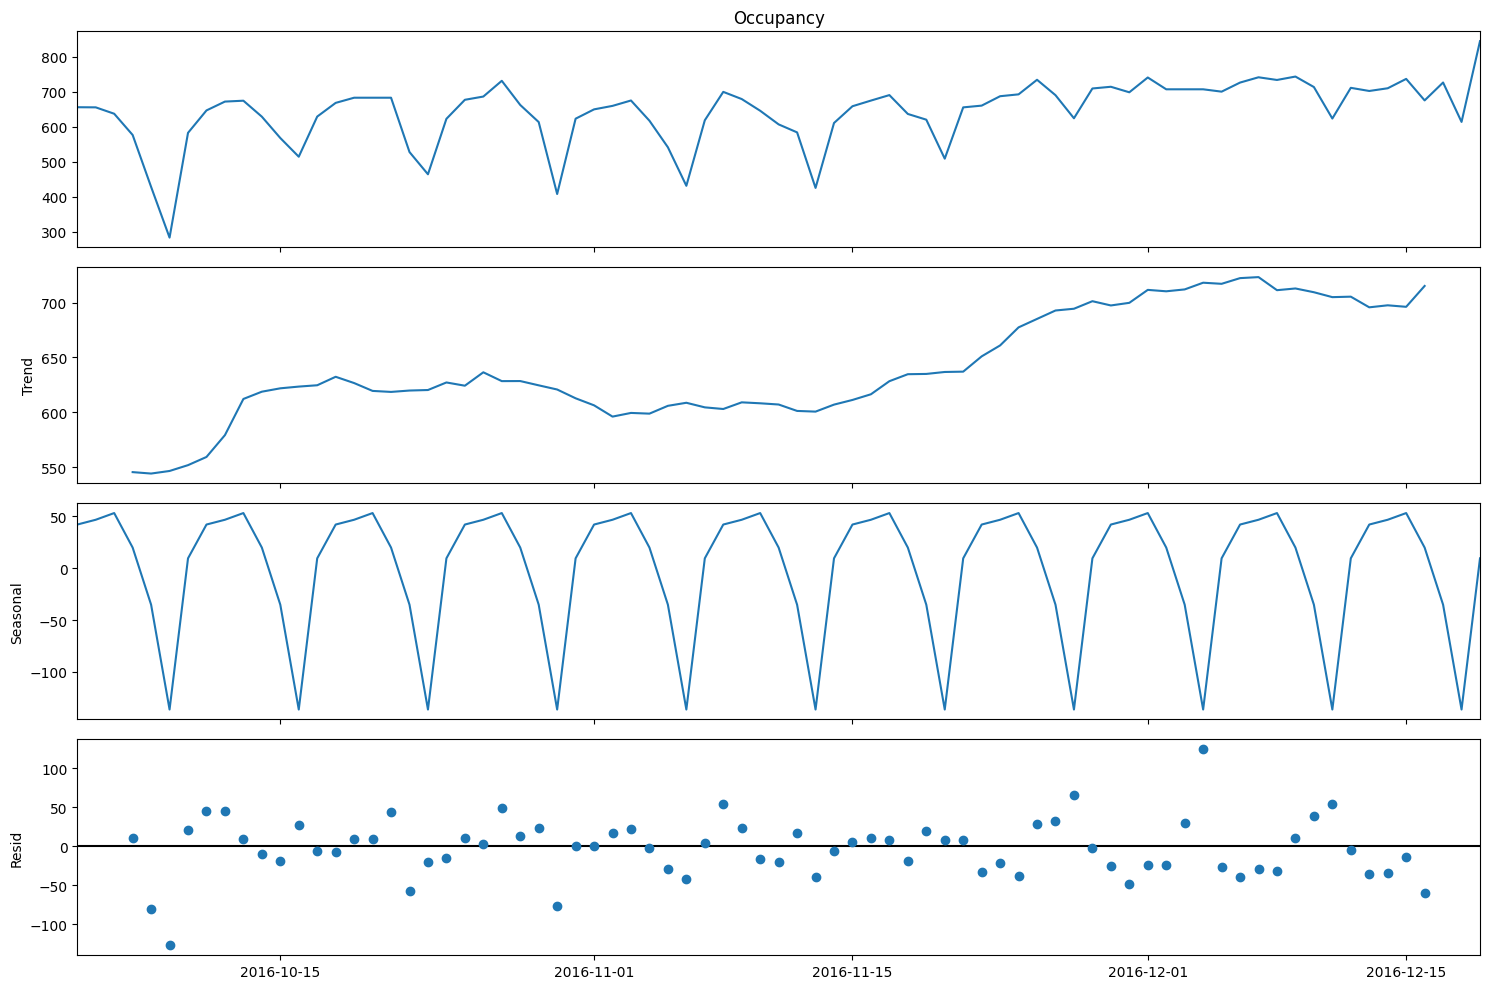

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Now that we have filled the missing values, let's attempt the seasonal decomposition again
result_filled = seasonal_decompose(average_daily_occupancy_filled, model='additive')

# Plot the seasonal decomposition
fig = result_filled.plot()
plt.gcf().set_size_inches(15, 10)
plt.tight_layout()
plt.show()

The seasonal decomposition of the average daily occupancy data has been successfully performed and plotted. This decomposition allows us to observe the trend, seasonal, and residual components of the time series data.

The analysis of the parking data has provided several insights:

The occupancy rates vary widely, indicating that some parking systems are underutilized while others may be overburdened.
There are clear patterns of parking usage across days of the week and hours of the day, with certain times showing significantly higher demand.
Seasonal decomposition has revealed underlying trends and seasonal fluctuations in parking occupancy.
Based on these findings, here are some conclusions and suggestions:

Dynamic Pricing: Implement dynamic pricing strategies to manage demand during peak hours and days, potentially increasing prices when demand is high and lowering them during off-peak times.
Capacity Management: For parking systems consistently near full occupancy, consider expanding capacity or directing overflow to underutilized areas.
Predictive Analytics: Use the identified patterns to develop predictive models for occupancy, aiding in planning and operational decisions.
Seasonal Adjustments: Adjust staffing and maintenance schedules according to the seasonal trends to optimize operations.
These strategies can help to balance the parking system's load, improve user experience, and increase operational efficiency.